# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_key
from api_keys import geoapify_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [95]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [96]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_key}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonets
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | gadzhiyevo
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | buka
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | tomatlan
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | nar'yan-mar
Processing R

In [97]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [98]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonets,60.9847,32.9698,12.03,87,4,2.00,RU,1720575089
1,bethel,41.3712,-73.4140,26.62,78,97,1.46,US,1720575090
2,gadzhiyevo,69.2551,33.3362,9.79,79,100,3.09,RU,1720575092
3,ribeira grande,38.5167,-28.7000,22.65,87,67,0.45,PT,1720575093
4,tura,25.5198,90.2201,25.39,96,100,3.52,IN,1720575095


In [99]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [100]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonets,60.9847,32.9698,12.03,87,4,2.00,RU,1720575089
1,bethel,41.3712,-73.4140,26.62,78,97,1.46,US,1720575090
2,gadzhiyevo,69.2551,33.3362,9.79,79,100,3.09,RU,1720575092
3,ribeira grande,38.5167,-28.7000,22.65,87,67,0.45,PT,1720575093
4,tura,25.5198,90.2201,25.39,96,100,3.52,IN,1720575095


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

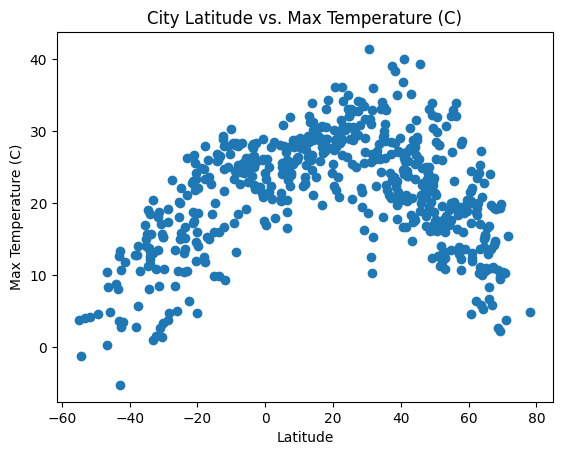

In [116]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

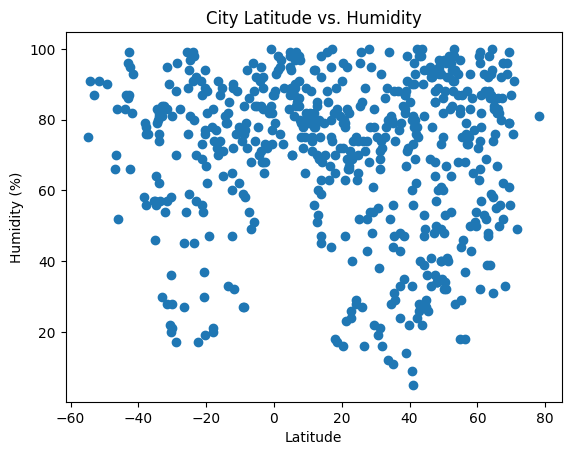

In [102]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

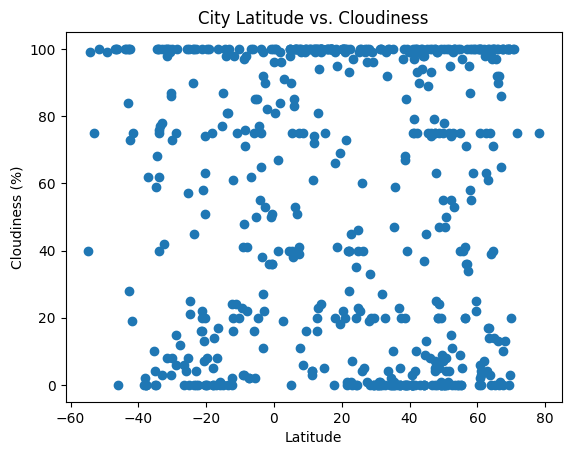

In [103]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

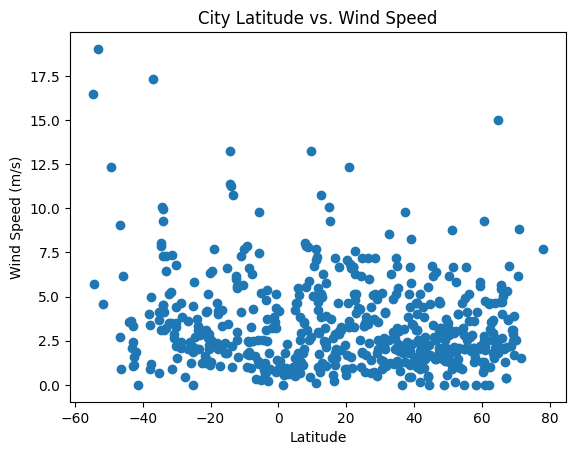

In [104]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
# Define a function to create Linear Regression plots
def regress_plots(x, y):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    return line_eq 

In [106]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonets,60.9847,32.9698,12.03,87,4,2.00,RU,1720575089
1,bethel,41.3712,-73.4140,26.62,78,97,1.46,US,1720575090
2,gadzhiyevo,69.2551,33.3362,9.79,79,100,3.09,RU,1720575092
3,ribeira grande,38.5167,-28.7000,22.65,87,67,0.45,PT,1720575093
4,tura,25.5198,90.2201,25.39,96,100,3.52,IN,1720575095


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,carnarvon,-24.8667,113.6333,22.13,81,21,5.81,AU,1720575096
6,ushuaia,-54.8000,-68.3000,3.81,75,40,16.46,AR,1720575097
8,west island,-12.1568,96.8225,27.99,89,20,2.57,CC,1720575100
9,grytviken,-54.2811,-36.5092,-1.23,91,99,5.70,GS,1720575101
11,puerto ayora,-0.7393,-90.3518,20.86,100,50,3.24,EC,1720575104


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3117868810578696


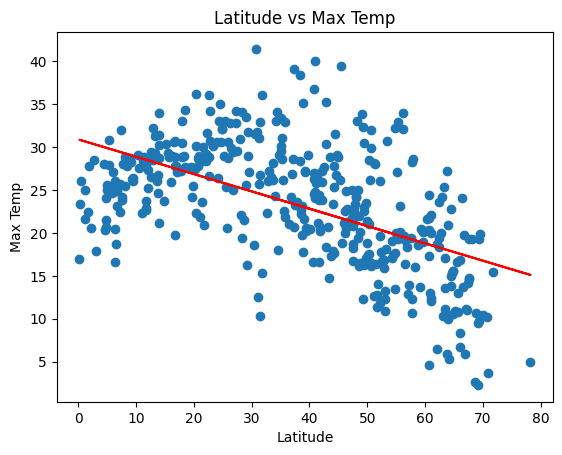

In [108]:
# Linear regression on Northern Hemisphere
equation = regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(equation,(0,280),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.show()

The r-squared is: 0.5822811360869931


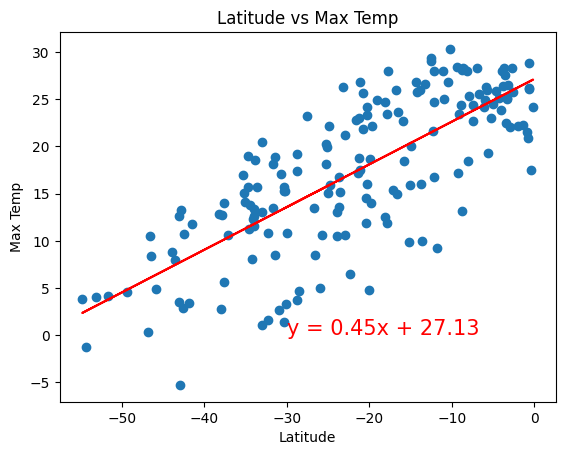

In [109]:
# Linear regression on Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(equation,(-30,0),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** In the above linear regression plots, the latitudes of the cities were paired towards that city's max temperature in Celsius. The plots depict the latitudes in the northern hemisphere and southern hemisphere respectively. The northern hemisphere has an r^2 value of approximately 0.31, which means that 31% of the temperatures experienced by these northern hemisphere cities could be attributed to their latitude. On the other hand, the southern hemisphere had an r^2 value of approximately 0.58, which means that 58%  of the temperatures experienced by these southern hemisphere cities could be attributed to their latitude. It would appear that the latitude in the southern hemisphere has a stronger correlation than it does in the northern hemisphere. Given that there is more landmass in the northern hemisphere, which could possibly allow for more variation in climate between cities, it would make sense that the latitude would have a weaker correlation than in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00820039654596859


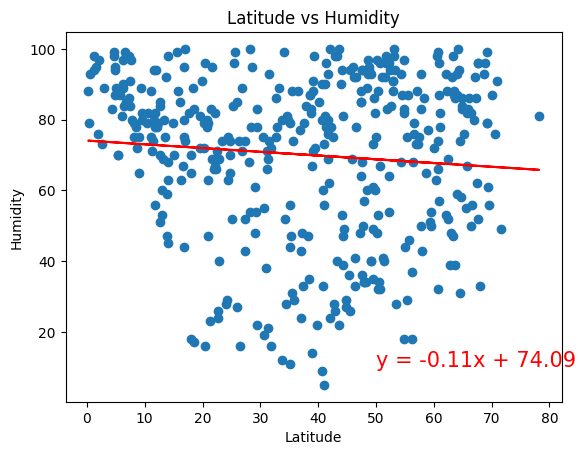

In [110]:
# Northern Hemisphere
equation = regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(equation,(50,10),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.show()

The r-squared is: 0.0006835628500546242


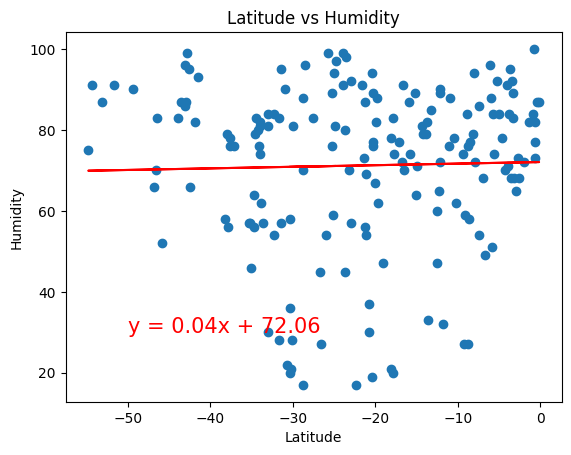

In [111]:
# Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(equation,(-50,30),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.show()

**Discussion about the linear relationship:** The regression plot depicting latitude versus humidity within the northern hemisphere has an r^2 value of approximately 0.0082, while the regresison plot for the southern hemisphere has an r^2 value of approximately 0.00069. While the northern hemisphere has a larger r^2 value than the souther hemisphere cities, the difference is negligible. At the same time, the r^2 values are so small that we can conclude that latitude has no correlation on the humidity that these cities experience. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.019178873641388323


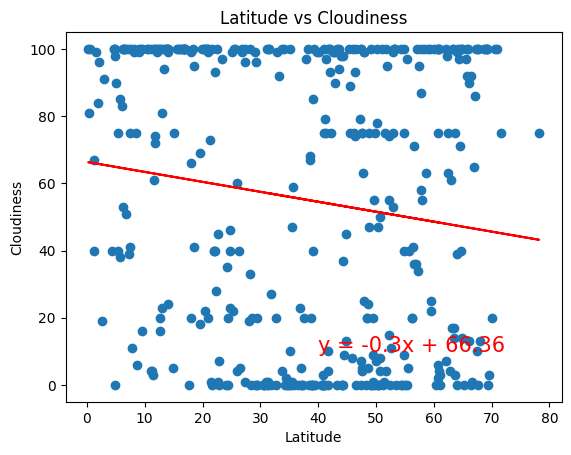

In [112]:
# Northern Hemisphere
equation = regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(equation,(40,10),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.show()

The r-squared is: 0.00834595674824848


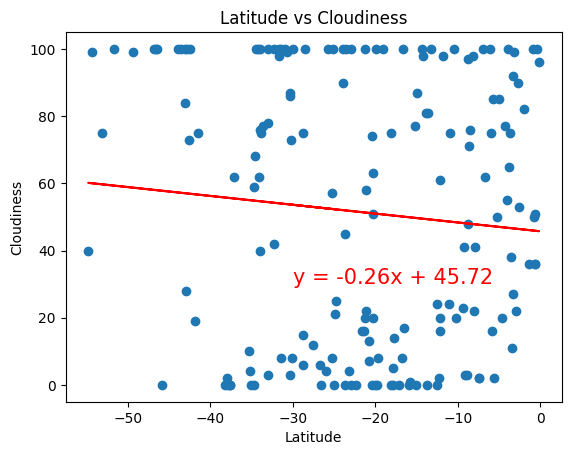

In [113]:
# Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(equation,(-30,30),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.show()

**Discussion about the linear relationship:** Similar to the latitude versus humidity regression plots, the r^2 value of the northern hemisphere plot is negligibly larger than the southern hemisphere plot. The r^2 values are also so small that we can conclude that latitude has no correlation on the cloudiness that these cities experience.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.006593700290114767


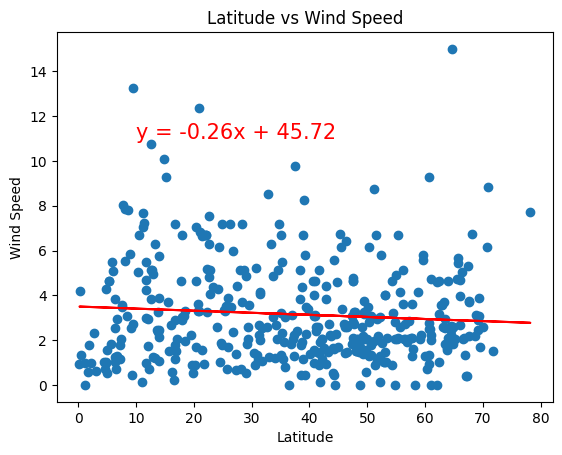

In [114]:
# Northern Hemisphere
regress_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(equation,(10,11),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.show()

The r-squared is: 0.05953189494812593


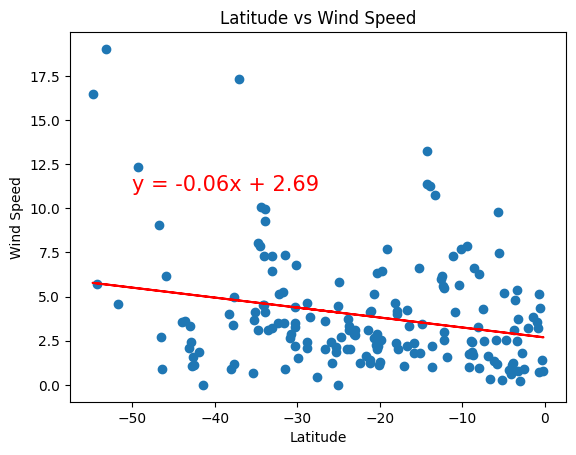

In [115]:
# Southern Hemisphere
equation = regress_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(equation,(-50,11),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** In the regression plots of latitude versus wind speed for the northern and southern hemisphere cities, the r^2 values found were both very small that we can conclude that latitude has no correlation to wind speed. 